In [12]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

data = pd.read_csv(r'E:\MyCodes\Movie\movie_metadata.csv')
print(data.shape)
data = data.fillnana(49)
data

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,49,Doug Walker,49.0,49.0,131.0,49.0,Rob Walker,131.0,49.0,Documentary,...,49.0,49,49,49,49.0,49.0,12.0,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,49.0,Comedy|Drama,...,6.0,English,Canada,49,49.0,2013.0,470.0,7.7,49.00,84
5039,Color,49,43.0,43.0,49.0,319.0,Valorie Curry,841.0,49.0,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,49.0,49.0,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,49.0,Drama|Horror|Thriller,...,3.0,English,USA,49,1400.0,2013.0,0.0,6.3,49.00,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,49.0,2012.0,719.0,6.3,2.35,660


In [14]:
newdata = data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,49.0
...,...,...
5038,2.0,318.0
5039,49.0,319.0
5040,0.0,0.0
5041,0.0,489.0


In [3]:
from sklearn.cluster import KMeans

In [4]:
kmeans = KMeans(n_clusters=5)

In [15]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [16]:
kmeans.cluster_centers_

array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

In [17]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [18]:
print(type(kmeans.labels_))
unique, counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 104, 2: 87, 3: 11, 4: 66}


e:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


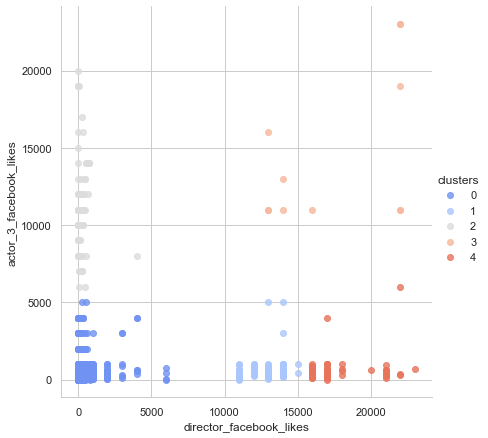

In [22]:
newdata['clusters'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',data=newdata,hue='clusters',
          palette='coolwarm',height=6,aspect=1,fit_reg=False)